In [1]:
import numpy
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, BatchNormalization, Activation
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.constraints import maxnorm
from keras.utils import np_utils
from keras.layers import ELU
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [2]:
#set random seed for reproducibility
seed = 21
elu_alpha = 0.1

## Prepping the Data

In [3]:
from keras.datasets import cifar10

In [4]:
(X_train, y_train),(X_test, y_test) = cifar10.load_data()

In [5]:
X_train[:10]

array([[[[ 59,  62,  63],
         [ 43,  46,  45],
         [ 50,  48,  43],
         ...,
         [158, 132, 108],
         [152, 125, 102],
         [148, 124, 103]],

        [[ 16,  20,  20],
         [  0,   0,   0],
         [ 18,   8,   0],
         ...,
         [123,  88,  55],
         [119,  83,  50],
         [122,  87,  57]],

        [[ 25,  24,  21],
         [ 16,   7,   0],
         [ 49,  27,   8],
         ...,
         [118,  84,  50],
         [120,  84,  50],
         [109,  73,  42]],

        ...,

        [[208, 170,  96],
         [201, 153,  34],
         [198, 161,  26],
         ...,
         [160, 133,  70],
         [ 56,  31,   7],
         [ 53,  34,  20]],

        [[180, 139,  96],
         [173, 123,  42],
         [186, 144,  30],
         ...,
         [184, 148,  94],
         [ 97,  62,  34],
         [ 83,  53,  34]],

        [[177, 144, 116],
         [168, 129,  94],
         [179, 142,  87],
         ...,
         [216, 184, 140],
        

Example training images and their labels: [6, 9, 9, 4, 1]
Corresponding classes for the labels: ['frog', 'truck', 'truck', 'deer', 'automobile']


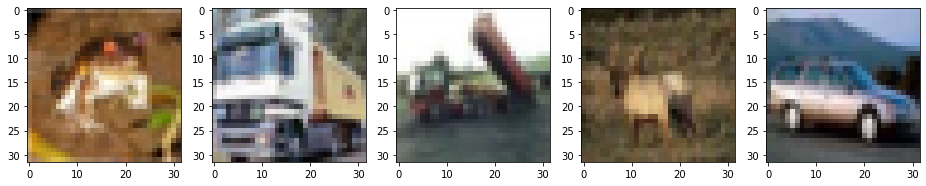

In [6]:
cifar_classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
print('Example training images and their labels: ' + str([x[0] for x in y_train[0:5]])) 
print('Corresponding classes for the labels: ' + str([cifar_classes[x[0]] for x in y_train[0:5]]))

f, axarr = plt.subplots(1, 5)
f.set_size_inches(16, 6)

for i in range(5):
    img = X_train[i]
    axarr[i].imshow(img)
plt.show()

In [7]:
# normalize the inputs from 0-255 to between 0 and 1 by dividing by 255
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train = X_train / 255.0
X_test = X_test / 255.0

MemoryError: Unable to allocate 586. MiB for an array with shape (50000, 32, 32, 3) and data type float32

In [ ]:
#X_train[:10]

In [ ]:
# encode the output values using one-hot encoding
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
class_num = y_test.shape[1]

## Designing the Model

In [ ]:
#create the model
model = Sequential()

In [ ]:
model.add(Conv2D(32, (3, 3), input_shape=X_train.shape[1:], padding='same'))
model.add(ELU(alpha=elu_alpha))
model.add(Dropout(0.2))
model.add(BatchNormalization())

In [ ]:
model.add(Conv2D(64, (3, 3), padding='same'))
model.add(ELU(alpha=elu_alpha))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))
model.add(BatchNormalization())

In [ ]:
model.add(Conv2D(64, (3, 3), padding='same'))
model.add(ELU(alpha=elu_alpha))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))
model.add(BatchNormalization())
    
model.add(Conv2D(128, (3, 3), padding='same'))
model.add(ELU(alpha=elu_alpha))
model.add(Dropout(0.2))
model.add(BatchNormalization())

In [ ]:
model.add(Flatten())
model.add(Dropout(0.2))

In [ ]:
model.add(Dense(256, kernel_constraint=maxnorm(3)))
model.add(ELU(alpha=elu_alpha))
model.add(Dropout(0.2))
model.add(BatchNormalization())

In [ ]:
model.add(Dense(128, kernel_constraint=maxnorm(3)))
model.add(ELU(alpha=elu_alpha))
model.add(Dropout(0.2))
model.add(BatchNormalization())

In [ ]:
model.add(Dense(class_num))
model.add(Activation('softmax'))

In [ ]:
epochs = 25
optimizer = 'adam'

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

In [ ]:
print(model.summary())

In [ ]:
numpy.random.seed(seed)
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=epochs, batch_size=64)

In [ ]:
def plotLosses(history):  
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

In [ ]:
plotLosses(history)

In [ ]:
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))
print(model.metrics_names)
print(score)

In [ ]:
from keras.models import load_model
model.save('project_model_S3.h5')